In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LR-SRGAN-A-HR

1/1 [==============================] - 8s 8s/step


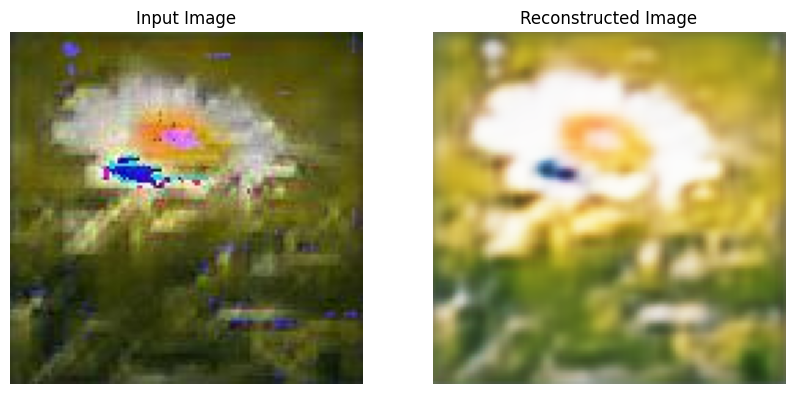

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/DL_Project/autoencoder_model_128.h5")

input_image_path = "/content/drive/MyDrive/DL_Project/fl_dt/generated/generated1.jpeg"


if os.path.exists(input_image_path):

    input_image = cv2.imread(input_image_path)

    if input_image is not None:
        # Continue with image processing
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        input_image = cv2.resize(input_image, (128, 128))  # Resize to 32x32 (matching autoencoder input size)
        input_image = input_image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

        # Perform image reconstruction using the loaded autoencoder
        reconstructed_image = loaded_autoencoder.predict(np.expand_dims(input_image, axis=0))

        # Visualize the input and reconstructed images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Input Image')
        plt.imshow(input_image)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title('Reconstructed Image')
        plt.imshow(reconstructed_image[0])
        plt.axis('off')

        plt.show()
    else:
        print("Failed to load the input image. Check the image format and content.")
else:
    print(f"File not found at path: {input_image_path}")


In [5]:
from PIL import Image
import numpy as np

# Convert the NumPy array to a valid PIL Image
generated_image_1 = (reconstructed_image[0] * 255).astype(np.uint8)  # Scale values to 0-255

# Create a PIL Image
im = Image.fromarray(generated_image_1)

# Save the image
output_path = "/content/drive/MyDrive/DL_Project/fl_dt/reconst_128/1.jpeg"
im.save(output_path)

print(f"Image saved at {output_path}")

Image saved at /content/drive/MyDrive/DL_Project/fl_dt/reconst_128/1.jpeg


In [6]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

sreeni_gr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/reconst_128/1.jpeg")
sreeni_hr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/hr_images_1/daisy_1_-10790155265df092.jpg")


sreeni_gr = cv2.cvtColor(sreeni_gr, cv2.COLOR_BGR2RGB)
sreeni_hr = cv2.cvtColor(sreeni_hr, cv2.COLOR_BGR2RGB)

# Normalize the pixel values to the range [0, 1]
sreeni_gr = sreeni_gr / 255.0
sreeni_hr = sreeni_hr / 255.0

# Calculate SSIM
ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)

print(f"SSIM Score: {ssim_score}")

SSIM Score: 0.5191458752183681


<ipython-input-6-85e55e58af1d>:17: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)


# Lr_Auto_SRGAN_Auto_Hr

In [7]:
sreeni_hr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/hr_images_1/daisy_1_-10790155265df092.jpg")

In [9]:
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [10]:
value = PSNR(sreeni_hr, sreeni_gr)
print(f"PSNR value is {value} dB")

PSNR value is 7.500465510210292 dB


1/1 [==============================] - 0s 284ms/step


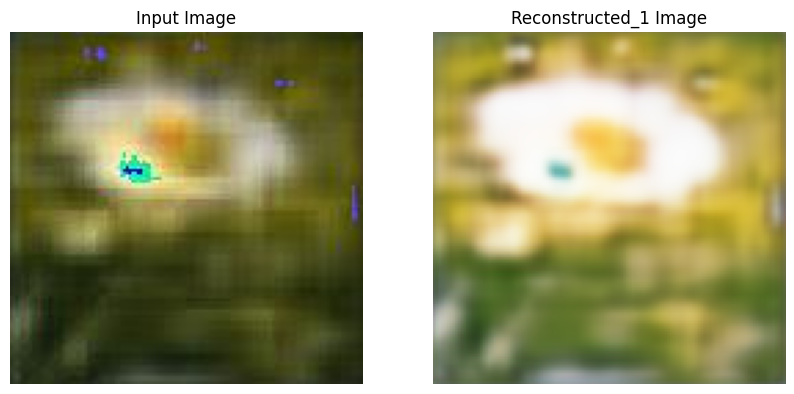

In [11]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

loaded_autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/DL_Project/autoencoder_model_128.h5")

input_image_path = "/content/drive/MyDrive/DL_Project/fl_dt/generated/generated1_1.jpeg"


if os.path.exists(input_image_path):

    input_image = cv2.imread(input_image_path)

    if input_image is not None:
        # Continue with image processing
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        input_image = cv2.resize(input_image, (128, 128))  # Resize to 32x32 (matching autoencoder input size)
        input_image = input_image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

        # Perform image reconstruction using the loaded autoencoder
        reconstructed_image = loaded_autoencoder.predict(np.expand_dims(input_image, axis=0))

        # Visualize the input and reconstructed images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Input Image')
        plt.imshow(input_image)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title('Reconstructed_1 Image')
        plt.imshow(reconstructed_image[0])
        plt.axis('off')

        plt.show()
    else:
        print("Failed to load the input image. Check the image format and content.")
else:
    print(f"File not found at path: {input_image_path}")


In [12]:
from PIL import Image
import numpy as np

# Convert the NumPy array to a valid PIL Image
generated_image_1 = (reconstructed_image[0] * 255).astype(np.uint8)  # Scale values to 0-255

# Create a PIL Image
im = Image.fromarray(generated_image_1)

# Save the image
output_path = "/content/drive/MyDrive/DL_Project/fl_dt/reconst_128/2.jpeg"
im.save(output_path)

print(f"Image saved at {output_path}")

Image saved at /content/drive/MyDrive/DL_Project/fl_dt/reconst_128/2.jpeg


In [13]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

sreeni_gr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/reconst_128/2.jpeg")
sreeni_hr = cv2.imread("/content/drive/MyDrive/DL_Project/fl_dt/hr_images_1/daisy_1_-10790155265df092.jpg")


sreeni_gr = cv2.cvtColor(sreeni_gr, cv2.COLOR_BGR2RGB)
sreeni_hr = cv2.cvtColor(sreeni_hr, cv2.COLOR_BGR2RGB)

sreeni_gr = sreeni_gr / 255.0
sreeni_hr = sreeni_hr / 255.0

# Calculate SSIM
ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)

print(f"SSIM Score: {ssim_score}")

SSIM Score: 0.42472738039585217


<ipython-input-13-f4f94a01cbfc>:17: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(sreeni_gr, sreeni_hr, multichannel=True)
